In [61]:
import torch
from torch.utils.data import DataLoader, Dataset
from pathlib import Path
from PIL import Image
from torchvision.transforms import ToTensor
from collections import Counter
from typing import Tuple

class AppleLoader(Dataset):
    def __init__(self, data_folder: Path):
        self.data_folder = data_folder
        self.image_files = list(self.data_folder.glob("**/*.JPG"))
        self.totensor = ToTensor()
        assert self.data_folder.is_dir()
    
    @staticmethod
    def _get_fruit_and_disease(filename: str) -> Tuple[str, str]:
        fruit, *disease = filename.split("_")
        disease = '_'.join(disease)
        return fruit, disease
    
    @staticmethod
    def _get_fruit(path: Path) -> str:
        fruit, disease = AppleLoader._get_fruit_and_disease(path.parent.name)
        return fruit
    
    @staticmethod
    def _get_disease(path: Path) -> str:
        fruit, disease = AppleLoader._get_fruit_and_disease(path.parent.name)
        return disease
    
    def _get_class(self, path: Path) -> str:
        return path.parent.name

    def _get_image(self, path: Path) -> torch.Tensor:
        im = Image.open(path)
        return self.totensor(im)
    
    def get_class_distribution(self):
        class_lst = [im_class for _, im_class in self]
        return Counter(class_lst)
        
    def get_better_class_distribution(self):
        out = {}
        for k, v in self.get_class_distribution().items():
            fruit, disease = AppleLoader._get_fruit_and_disease(k)
            if fruit not in out:
                out[fruit] = {}
            out[fruit][disease] = v
        return out

    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        return self._get_image(self.image_files[index]), self._get_class(self.image_files[index])
        
data_folder = Path("./images")
loader = AppleLoader(data_folder)        

In [78]:
import matplotlib.pyplot as plt
from random import shuffle
import numpy as np

import matplotlib.colors as mcolors
color_list = list(mcolors.cnames.values())
shuffle(color_list)    

class_distribution = loader.get_better_class_distribution()
# class_distribution = {"Apple": class_distribution["Apple"]}
fig = plt.figure(figsize = (18, 8 * len(class_distribution)))
axes = fig.subplots(len(class_distribution), 2)

if not isinstance(axes[0], np.ndarray):
    axes = np.array([axes])

color_offset = 0
for ax, fruit in zip(axes, class_distribution.keys()):
    print(fruit)
    fruit_distribution = class_distribution[fruit]
    names              = list(fruit_distribution.keys())
    values             = list(fruit_distribution.values())
    print(type(ax))
    print(ax)
    pieax = ax[0]
    pieax.set_title(f"Class Distribution: {fruit}")    
    pieax.pie(values, labels=names, colors=list(color_list)[color_offset:color_offset+len(names)], autopct='%1.1f%%')
    
    barax = ax[1]
    barax.set_title(f"Class Distribution: {fruit}")    
    barax.bar(range(len(names)), values, tick_label=names, color=list(color_list)[color_offset:color_offset+len(names)])
    
    color_offset += len(names)

plt.show()

In [15]:
c = class_distribution
c
new = {}
for k, v in c.items():
    fruit, disease = AppleLoader._get_fruit_and_disease(k)
    print(fruit, disease)
    if fruit not in new:
        new[fruit] = {}
    new[fruit][disease] = v


class_distribution = loader.get_class_distribution()
names              = list(class_distribution.keys())
values             = list(class_distribution.values())

fig = plt.figure(figsize = (18, 8))
ax  = fig.add_subplot(111)
ax.set_title(f"Class Distribution: {data_folder}")    
ax.bar(range(len(class_distribution)), values, tick_label=names)
plt.show()

    

Grape Esca
Apple healthy
Apple Black_rot
Apple rust
Apple scab
Grape healthy
Grape spot
Grape Black_rot


{'Grape': {'Esca': 1382, 'healthy': 422, 'spot': 1075, 'Black_rot': 1178},
 'Apple': {'healthy': 1640, 'Black_rot': 620, 'rust': 275, 'scab': 629}}

axes          = array([<Axes: >, <Axes: >], dtype=object)
type(axes)    = <class 'numpy.ndarray'>
type(axes[0]) = <class 'matplotlib.axes._axes.Axes'>
2

axes          = array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)
type(axes)    = <class 'numpy.ndarray'>
type(axes[0]) = <class 'numpy.ndarray'>
2
2


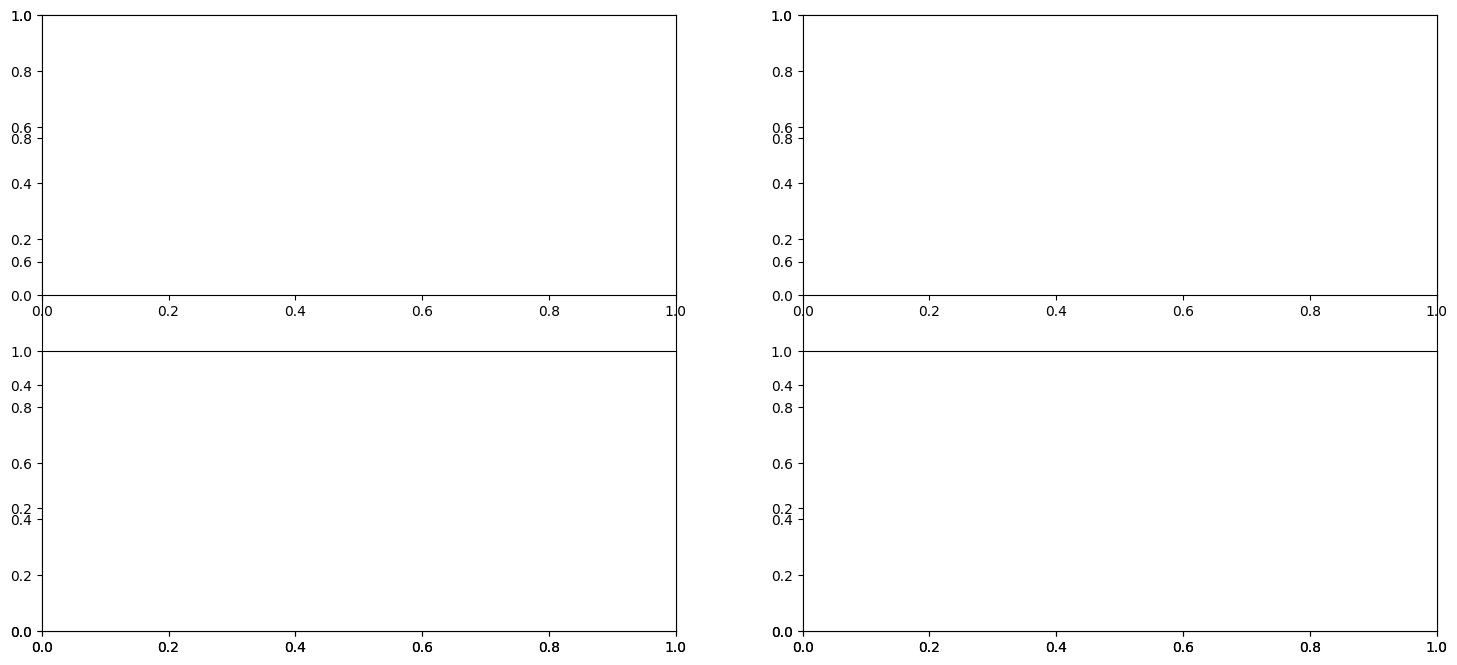

In [76]:
fig = plt.figure(figsize = (18, 8 * len(class_distribution)))
axes = fig.subplots(1, 2)

print(f"{axes          = }")
print(f"{type(axes)    = }")
print(f"{type(axes[0]) = }")
print(len(axes))

print()
axes = fig.subplots(2, 2)

print(f"{axes          = }")
print(f"{type(axes)    = }")
print(f"{type(axes[0]) = }")
